<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
# If you were unable to complete the previous lab correctly you can uncomment and load this csv
# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


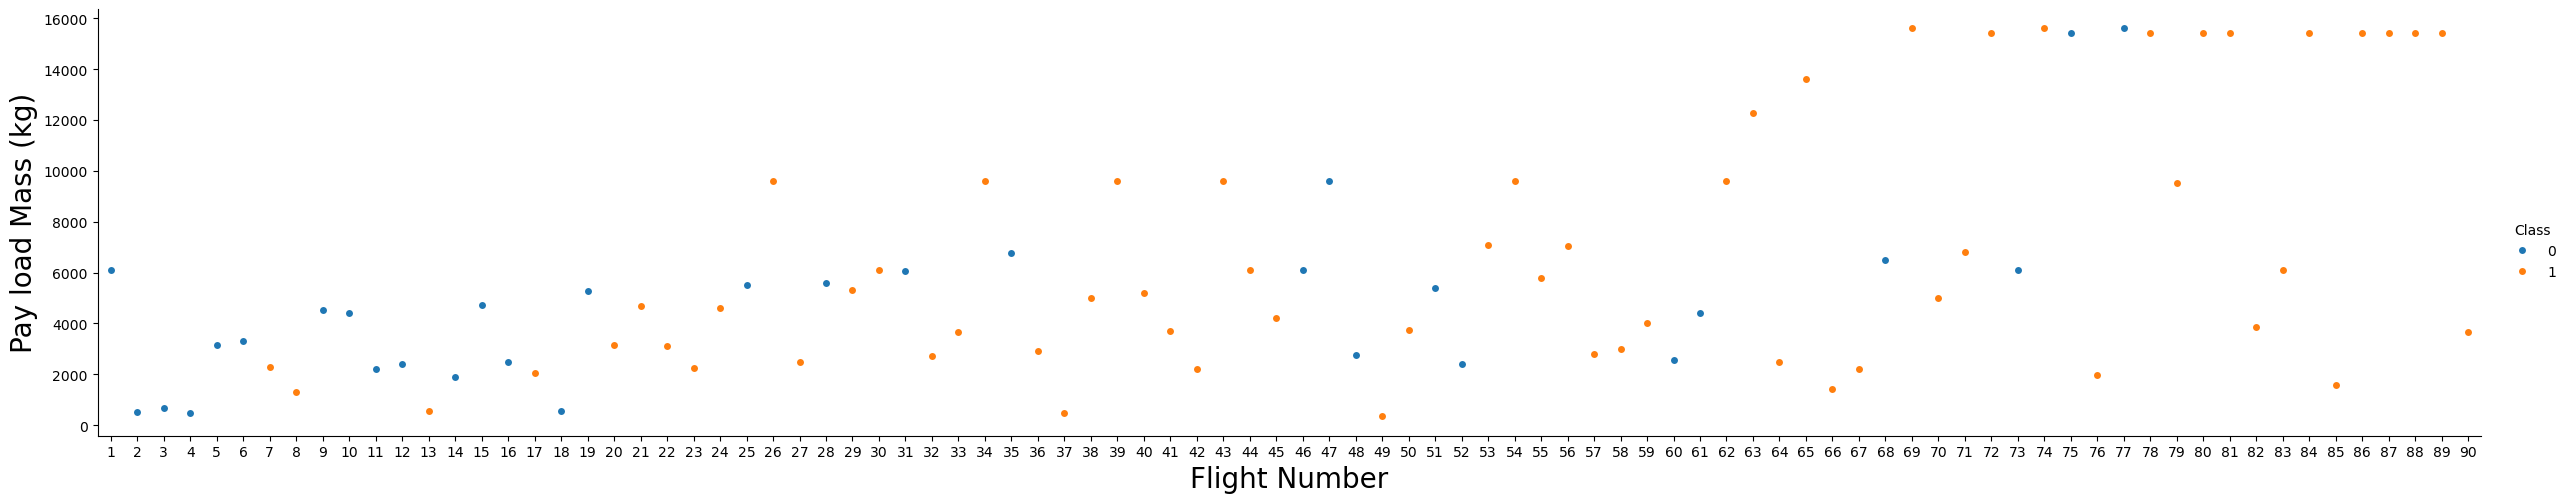

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# My Observation
Based on the new Flight Number vs. Payload Mass (kg) scatter plot, here's an analysis of the patterns observed:

Observations:
Payload Mass and Flight Number Relationship:

Lower flight numbers (1-30) tend to have smaller payload masses, primarily under 6000 kg. There is a gradual increase in payload mass as the flight numbers increase.
From flight numbers 60 and above, there are several missions with much larger payloads, often exceeding 10,000 kg.
Success vs. Failure:

Successes (orange dots) are distributed across both high and low payload masses, indicating successful landings for a wide range of payloads.
Failures (blue dots) are more frequent in earlier flight numbers and are scattered across lower payload mass values. However, failures can also be seen sporadically in higher flight numbers, especially in the range of flight numbers 50-70.
Payload Trends:

Starting from Flight Number 65 onward, we see more missions carrying large payloads (above 10,000 kg), with a significant portion of them being successful (orange dots).
Earlier flight numbers (1-20) have payload masses under 6000 kg and show a balanced mix of successes and failures.
Large Payloads:

The largest payloads (above 15,000 kg) are predominantly in later flight numbers (75 and above), with a higher success rate. This could suggest that SpaceX improved its technology and performance over time to handle larger payloads more reliably.
Improvement in Success Rates:

As flight numbers increase, there is a notable improvement in the success rate, especially in flights carrying larger payloads (above 10,000 kg). This may reflect improvements in SpaceX's ability to manage both heavier payloads and successful landings.
Conclusion:
Early missions tend to have lower payload masses and higher failure rates, suggesting the initial learning phase for SpaceX.
Later missions, particularly after flight number 60, show a noticeable trend toward higher payload capacities with more successful landings, indicating significant technological improvements over time.
Successes are frequent across both smaller and larger payloads in later flight numbers, reflecting increasing confidence and reliability in handling diverse payloads.

### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


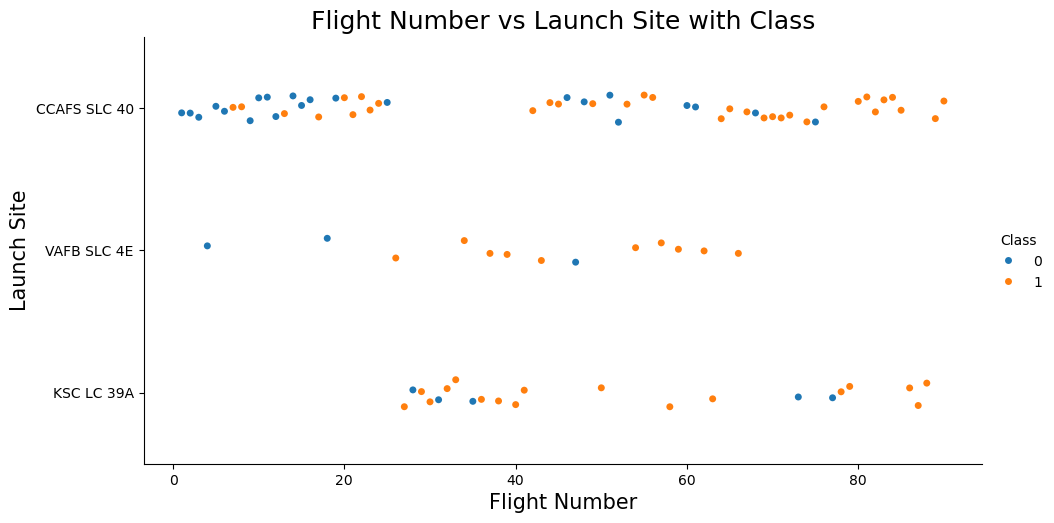

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2)

# Set the labels and title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site with Class", fontsize=18)

# Show the plot
plt.show()

### My Observations ###
Based on the Flight Number vs. Launch Site scatter plot with hue representing Class (0 for failure, 1 for success), we can observe the following patterns:

Launch Sites Distribution:

There are three distinct launch sites:
CCAFS SLC 40: The most frequently used launch site.
VAFB SLC 4E: A site with fewer launches compared to the others.
KSC LC 39A: A launch site that becomes more frequent as the flight numbers increase.
Success and Failure Distribution:

Successes (orange dots) seem to be spread fairly consistently across the flight numbers at all three launch sites.
Failures (blue dots) are scattered but seem to cluster more toward earlier flight numbers, especially at CCAFS SLC 40.
Progression Over Time:

At KSC LC 39A, it appears that earlier flight numbers (lower numbers) show more failures (blue dots), while later flight numbers (higher numbers) show a higher concentration of successes (orange dots). This suggests that as more flights were launched, SpaceX saw increasing success rates at this site.
CCAFS SLC 40 shows a mix of successes and failures across the range of flight numbers, but the failures tend to decrease as flight numbers increase, indicating improvement over time.
Launch Site-Specific Performance:

VAFB SLC 4E seems to have relatively few flights, but with a high proportion of successes, suggesting better performance on fewer flights.
KSC LC 39A shows a strong improvement in success rates over time, with fewer failures in later flights.
CCAFS SLC 40 has the highest number of launches but shows a mix of successes and failures throughout.
Conclusion:
SpaceX's success rate improves over time, as seen with fewer failures in later flight numbers.
The KSC LC 39A site shows a trend toward more successful landings in later flights.
CCAFS SLC 40 is used most frequently but has a mix of successes and failures across the timeline.
VAFB SLC 4E has fewer launches, but the success rate is high.

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


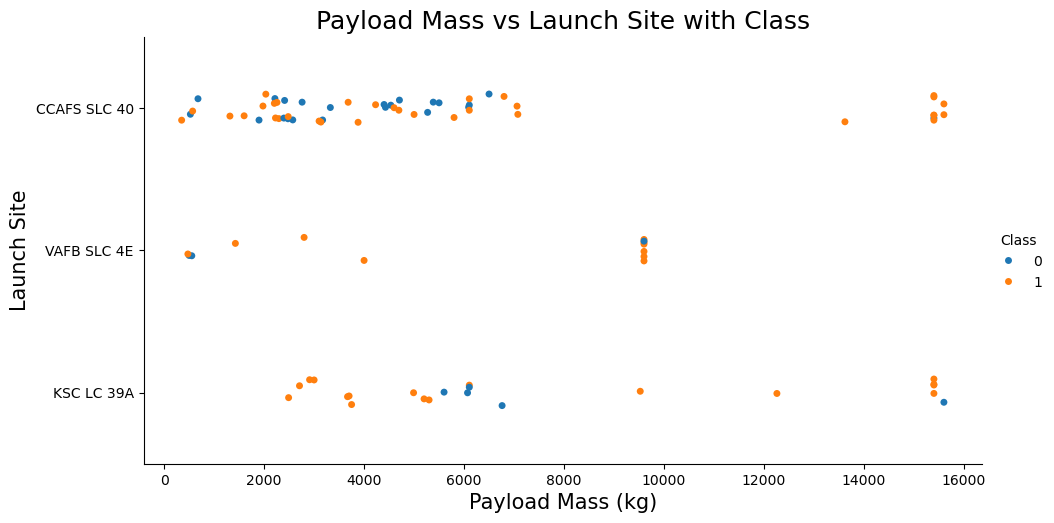

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, kind="strip", aspect=2)

# Set the labels and title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs Launch Site with Class", fontsize=18)

# Show the plot
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


C:\Users\SVaratharajKannan(36\AppData\Local\Temp\ipykernel_36048\3500192352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='rainbow')


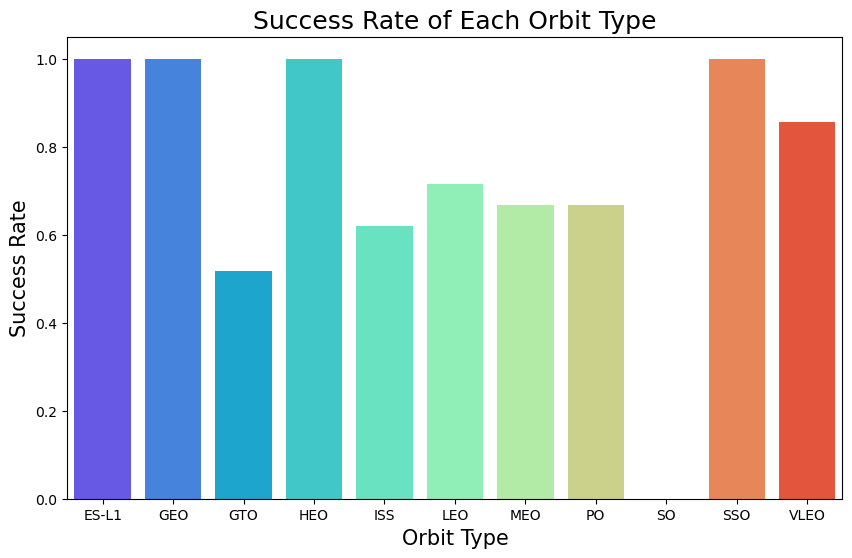

In [8]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Step 2: Create a bar chart for the success rate of each orbit type
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='rainbow')

# Step 3: Set the labels and title
plt.xlabel('Orbit Type', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.title('Success Rate of Each Orbit Type', fontsize=18)

# Show the plot
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.
# My Observation:
Orbits with High Success Rate:
ES-L1, GEO, HEO, SSO:

These orbits have a 100% success rate (a success rate of 1.0).
This means that all the launches directed toward these orbits were successful, indicating consistent performance for missions targeting these orbits.
VLEO:

This orbit also has a high success rate, close to 90%.
While not perfect, it's still very reliable, with most launches achieving success.
Orbits with Moderate Success Rate:
LEO (Low Earth Orbit):
This orbit shows a success rate of around 80%, meaning the majority of launches to LEO were successful, but there were some failures.
MEO and PO:
These orbits have a success rate around 70-80%, which indicates a reasonably good success rate but with room for improvement.
Orbits with Lower Success Rate:
GTO (Geostationary Transfer Orbit):

GTO shows a significantly lower success rate of around 50%, meaning that only about half of the launches to GTO were successful. This suggests that missions targeting GTO are more challenging.
ISS:

ISS has a success rate of around 65-70%, showing that while the majority of missions are successful, there is still a notable percentage of failures.
Conclusion:
ES-L1, GEO, HEO, and SSO orbits are highly reliable with perfect success rates.
GTO appears to be a more challenging orbit, with a 50% success rate, suggesting that missions to this orbit are more complex or face more risks.
LEO, MEO, and PO have moderate success rates, with most launches being successful but still having occasional failures.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


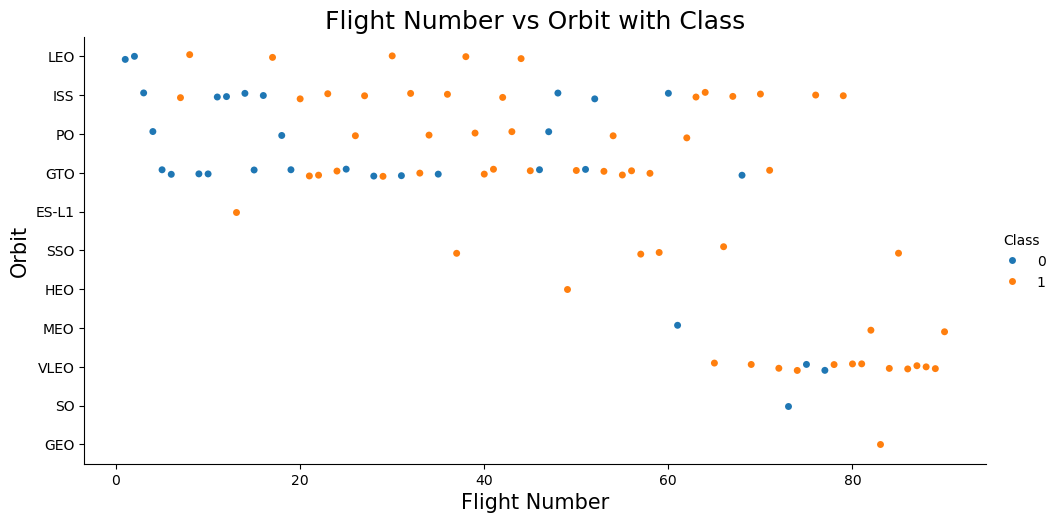

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, kind="strip", aspect=2)

# Set the labels and title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Flight Number vs Orbit with Class", fontsize=18)

# Show the plot
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


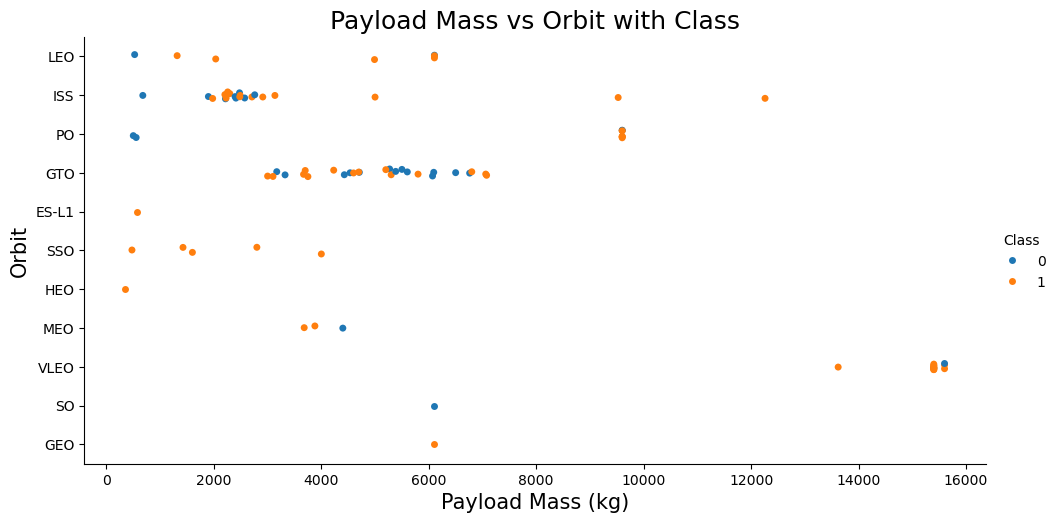

In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, kind="strip", aspect=2)

# Set the labels and title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Payload Mass vs Orbit with Class", fontsize=18)

# Show the plot
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

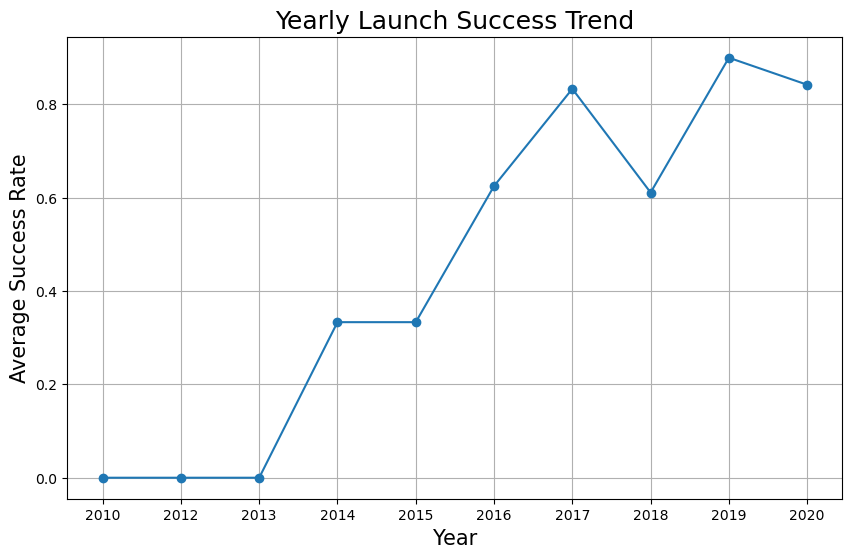

In [12]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Year'] = Extract_year(df)

# Step 2: Group by Year and calculate the average success rate (Class)
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Step 3: Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate['Year'], yearly_success_rate['Class'], marker='o')

# Set the labels and title
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Success Rate', fontsize=15)
plt.title('Yearly Launch Success Trend', fontsize=18)

# Show the plot
plt.grid(True)
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

In [14]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [15]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the resulting dataframe
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [16]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

# Stat
print("Rows count :", features_one_hot.shape[0])

# Display the first few rows to confirm the changes
features_one_hot.head()

Rows count : 90


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
